In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [54]:
df = pd.read_csv('../dataset/rumah123_jabodetabek.csv')

In [55]:
df.describe()

,location,sub_district,title,price,lt,lb
count,99215,99215,99211,99215,99153,98757
unique,12,176,84809,2035,1798,1127
top,tangerang,cipayung,Rumah murah minimalis siap huni,"Rp 1,5 Miliar",60 m²,200 m²
freq,17177,2000,51,1845,8674,3602


## Cleaning

### Replace '-' with blank space (' ')

In [56]:
df['sub_district'] = df['sub_district'].str.replace('-', ' ')
df['location'] = df['location'].str.replace('-', ' ')

### Capitalize Each Word

In [57]:
df['sub_district'] = df['sub_district'].str.title()
df['location'] = df['location'].str.title()

### Convert price from 'rupiah terbilang' to float

In [58]:
df['price_wording'] = df['price']

df['price'] = df['price'].str.replace('Rp ', '')
df['price'] = df['price'].str.replace('Hubungi', '')
df['price'] = df['price'].str.replace(',', '.')

df[['price', 'price_unit']] = df['price'].str.split(' ', expand=True)
df = df[df['price_unit'] != 'Agen']

In [59]:
df['price'] = df['price'].astype(float)

def multiply_price(row: float):
    if row['price_unit'] == 'Miliar':
        return row['price'] * 1000000000
    elif row['price_unit'] == 'Juta':
        return row['price'] * 1000000
    else:
        return row['price']

df['price'] = df.apply(multiply_price, axis=1)

df = df.drop(columns=['price_unit'])

### Remove square root (m²) unit

In [60]:
df['lt'] = df['lt'].str.replace(' m²', '')
df['lb'] = df['lb'].str.replace(' m²', '')

df['lt'] = df['lt'].astype(float)
df['lb'] = df['lb'].astype(float)


## EDA

### Sample After Cleaning

In [84]:
df.sample(5, random_state=16)

,location,sub_district,title,price,lt,lb,price_wording
87950,Bekasi,Medan Satria,Rumah Bagus Siap Huni Di Taman Harapan Baru Be...,750000000.0,72.0,60.0,Rp 750 Juta
13220,Jakarta Timur,Ciracas,"Rumah Lama Di PKP, Kelapa Dua Wetan , Ciracas",12500000000.0,817.0,300.0,"Rp 12,5 Miliar"
40031,Bogor,Ciomas,RUMAH CANTIK MINIMALIS SIAP HUNI TAMAN PAGELAR...,600000000.0,65.0,100.0,Rp 600 Juta
58789,Depok,Tapos,Rumah Dekat Tol Dan Stasiun Lrt Cimanggis 20 J...,630000000.0,70.0,36.0,Rp 630 Juta
12377,Jakarta Timur,Cipayung,Rumah 2 Lantai Baru di Cipayung Kota Jakarta T...,877000000.0,51.0,67.0,Rp 877 Juta


### Basic Statistic

In [70]:
df.describe()

,price,lt,lb
count,99205.0,99143.0,98747.0
mean,4577785150.4,20512.0,240.7
std,16231654378.7,4729883.4,7100.1
min,2000000.0,1.0,-385.0
25%,772000000.0,72.0,63.0
50%,1570000000.0,108.0,120.0
75%,3600000000.0,208.0,232.0
max,995000000000.0,1325000000.0,2105500.0


### Count Null Values

In [72]:
df.isna().sum()

location           0
sub_district       0
title              4
price              0
lt                62
lb               458
price_wording      0
dtype: int64

### Distribusi Kecamatan

<Axes: title={'center': 'Distribusi Banyak Instance'}, ylabel='Frequency'>

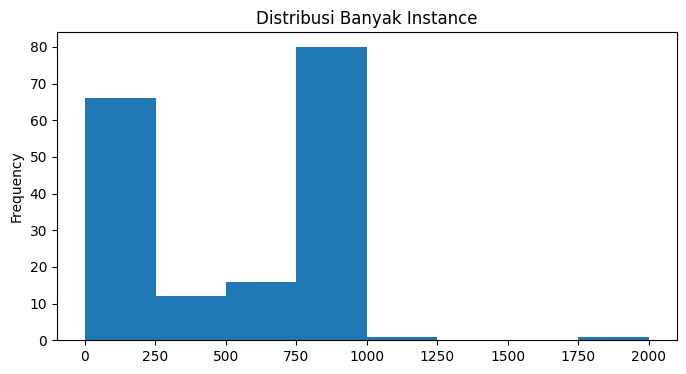

In [82]:
count_kecamatan = df['sub_district'].value_counts()

plt.figure(figsize=(8, 4))
plt.title('Distribusi Banyak Instance')
plt.xlabel('Jumlah Kecamatan')
count_kecamatan.plot(kind='hist', bins=8)